
<a href="https://colab.research.google.com/github/terrematte/mlops_wandb/blob/main/lesson_sentiment_analysis/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) of Text Data for Sentiment Analysis



In this Exploratory Data Analysis (EDA), we delve into a dataset comprising text files categorized into positive and negative sentiments, aimed at understanding its structure and characteristics before proceeding with sentiment analysis tasks. The dataset is housed in a Weights & Biases (wandb) artifact under the project **`my_user/sentiment_analysis`**, with the artifact name **`txt_sentoken:v0`**.

The dataset is organized into two subfolders, **`pos`** and **`neg`**, each containing 1,000 text files representing positive and negative sentiments respectively.



**1. Data Overview:**
   - **File Count:** We first verify the count of files in each subfolder to ensure there are indeed 1,000 files in both `pos` and `neg` subfolders.
   - **File Size Analysis:** We analyze the size of the files (in bytes) to understand the variation in text length across positive and negative sentiments.

**2. File Size Distribution:**
   - A histogram is generated to visualize the distribution of file sizes in both `pos` and `neg` subfolders. This aids in understanding the spread and central tendency of text lengths in our dataset.

The EDA is performed using a Python script, which:
   - Initializes a wandb run to log the analysis results and visualizations.
   - Fetches the artifact from wandb and downloads its content to the local directory.
   - Iterates through each subfolder to count the number of files and collect file size data.
   - Logs the file count information to wandb.
   - Creates and saves a histogram of file sizes, which is also logged to wandb.

This preliminary analysis provides insights into the basic characteristics of the dataset, setting the stage for further analyses and preprocessing steps necessary for subsequent sentiment analysis tasks. Logging the analysis results and visualizations to wandb ensures a traceable and reproducible data science workflow.

## Install and load libraries

In [ ]:
!pip install wandb

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import os
import matplotlib.pyplot as plt
import wandb

## Download sentiment analysis data artifact from Wandb

In [ ]:
# Initialize wandb run
wandb.init(project='sentiment_analysis', save_code=True)

# Get the artifact
artifact = wandb.use_artifact('txt_sentoken:v0')

# Download the content of the artifact to the local directory
artifact_dir = artifact.download()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: terrematte. Use `wandb login --relogin` to force relogin


wandb:   2000 of 2000 files downloaded.  


In [ ]:
# Subfolders 'pos' and 'neg'
subfolders = ['pos', 'neg']

# Initialize lists to store results
file_counts = []
file_sizes = {'pos': [], 'neg': []}

# Iterate over each subfolder
for subfolder in subfolders:
    # Full path to the subfolder
    subfolder_path = os.path.join(artifact_dir, subfolder)

    # Get the list of files in the subfolder
    files = os.listdir(subfolder_path)

    # Add the file count to the list
    file_counts.append(len(files))

    # Get and store the size of each file
    for file in files:
        file_path = os.path.join(subfolder_path, file)
        file_size = os.path.getsize(file_path)  # size in bytes
        file_sizes[subfolder].append(file_size)

# Log the file counts to wandb
for subfolder, count in zip(subfolders, file_counts):
    wandb.log({f'Number of files in {subfolder}': count})

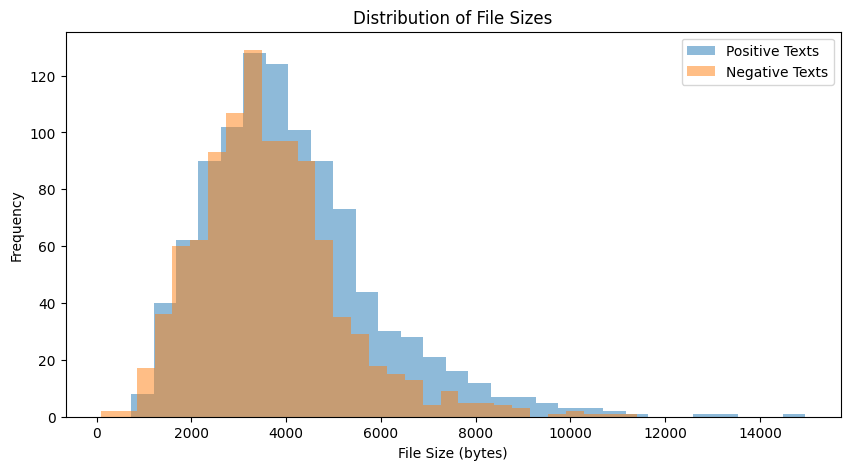

In [ ]:
# Histogram of file sizes
plt.figure(figsize=(10, 5))
plt.hist(file_sizes['pos'], bins=30, alpha=0.5, label='Positive Texts')
plt.hist(file_sizes['neg'], bins=30, alpha=0.5, label='Negative Texts')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of File Sizes')
plt.savefig('file_size_distribution.png')  # Save the plot to a file
plt.show()
plt.close()

# Log the histogram image to wandb
wandb.log({"File Size Distribution": wandb.Image('file_size_distribution.png')})

In [ ]:
# Optionally, finish the wandb run (if this is the end of your script)
wandb.finish()

Number of files in neg,▁
Number of files in pos,▁
Number of files in neg,1000
Number of files in pos,1000


## Reference:

Analysis implemented and available at https://github.com/ivanovitchm/mlops/tree/main/lessons/week_09